In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_palette(palette='viridis')



In [2]:
df = pd.read_csv('./mxmh_survey_results.csv')
pd.set_option('display.max_columns', None)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


Cleaning Data

In [5]:
#dropping some Values which are high

drop_bpm= df[df['BPM']>200].index
df.drop(drop_bpm, axis=0 ,inplace=True)

drop_age= df[df['Age']>70].index
df.drop(drop_age , axis=0 ,inplace=True)

drop_time=df[df['Hours per day']> 15].index
df.drop(drop_time, axis=0 ,inplace=True)

In [6]:
#Removing Missing Values
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [7]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df['Primary streaming service']=df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0] )

In [8]:
bpm_na=df[df['BPM'].isnull() == True]
bpm_na

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
10,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,Never,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,8/27/2022 23:04:00,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,Never,Never,Very frequently,Never,Sometimes,Never,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,8/27/2022 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,Rarely,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Rarely,Rarely,Rarely,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,8/28/2022 10:30:22,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Never,Rarely,Rarely,Very frequently,Never,Very frequently,Sometimes,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,8/28/2022 10:54:30,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,Never,Never,Never,Rarely,Never,Rarely,Sometimes,Rarely,Never,Sometimes,Very frequently,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,9/24/2022 0:42:39,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,Never,Rarely,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,10/3/2022 10:00:01,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,Sometimes,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Never,Never,Rarely,Rarely,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,10/3/2022 15:38:19,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Rarely,Rarely,Sometimes,Sometimes,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,10/4/2022 8:53:39,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,Never,Never,Never,Rarely,Never,Never,Sometimes,Never,Never,Rarely,Never,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [9]:
bpm_na['Fav genre'].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [10]:
bpm_na_genre =['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

In [11]:
for i in bpm_na_genre:
    df['BPM'] = df['BPM'].fillna(round(df[df['Fav genre']==i]['BPM'].mean(),0) , inplace=True)

In [12]:
df.shape

(716, 33)

In [13]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [14]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)
df.head(2)


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,None,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,None,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve


In [15]:
df.rename(columns={'Fav genre':'Genre','Frequency [Classical]':'Classical', 'Frequency [Country]':'Country', 'Frequency [EDM]':'EDM' , 'Frequency [Folk]': 'Folk', 'Frequency [Gospel]': 'Gospel','Frequency [Hip hop]':'Hip Hop', 'Frequency [Jazz]':'Jazz','Frequency [K pop]': 'K Pop', 'Frequency [Latin]' : 'Latin' , 'Frequency [Lofi]' : 'LoFi' , 'Frequency [Metal]' : 'Metal' , 'Frequency [Pop]': 'Pop', 'Frequency [R&B]': 'R&B','Frequency [Rap]' : 'Rap', 'Frequency [Rock]' :'Rock' , 'Frequency [Video game music]	' : 'Video Game Music' },inplace=True)
df.head(2)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Genre,Exploratory,Foreign languages,BPM,Classical,Country,EDM,Folk,Gospel,Hip Hop,Jazz,K Pop,Latin,LoFi,Metal,Pop,R&B,Rap,Rock,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,None,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,None,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve


Visualization


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spotify'),
  Text(1, 0, 'Pandora'),
  Text(2, 0, 'YouTube Music'),
  Text(3, 0, 'I do not use a streaming service.'),
  Text(4, 0, 'Apple Music'),
  Text(5, 0, 'Other streaming service')])

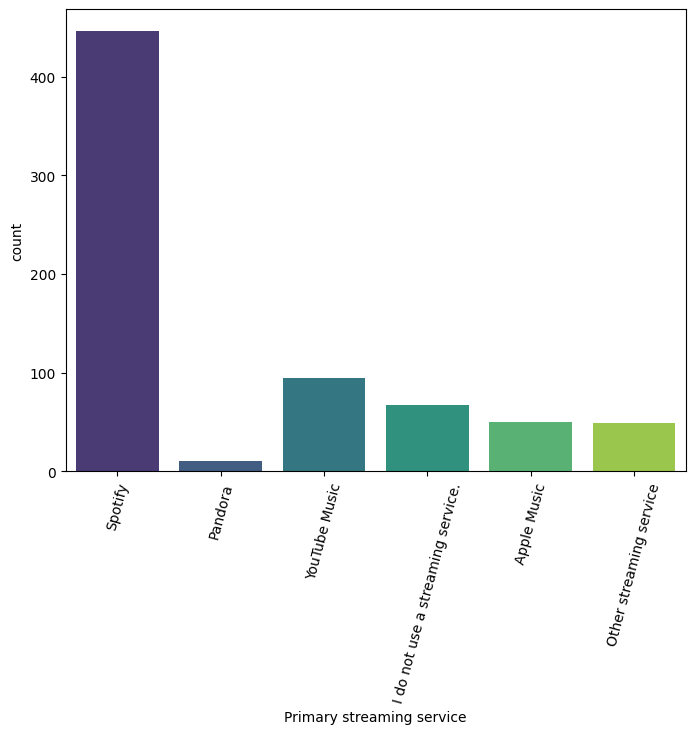

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Primary streaming service'])
plt.xticks(rotation=75)

Clearly we can see Spotify is the most used Streaming Platfrom

<Axes: xlabel='Age', ylabel='Count'>

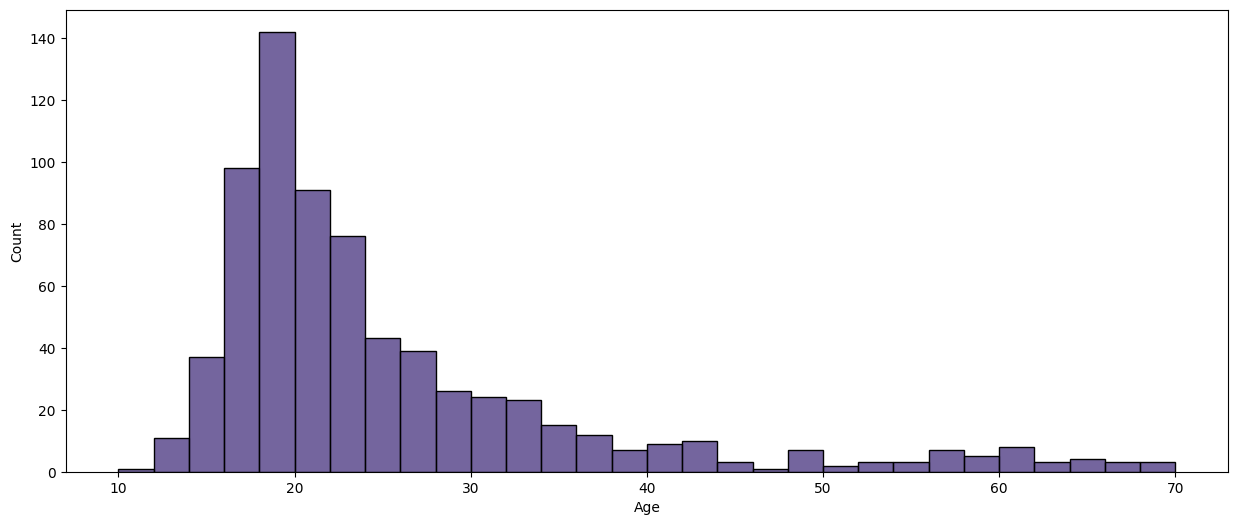

In [17]:
plt.figure(figsize=(15,6))
sns.histplot(x=df['Age'])

Most people around 15 to 25 listen to music a lot

C:\Users\madhu\AppData\Local\Temp\ipykernel_9196\3114729400.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y=df['Age'] , x=df['Genre'],ci=None)


<Axes: xlabel='Genre', ylabel='Age'>

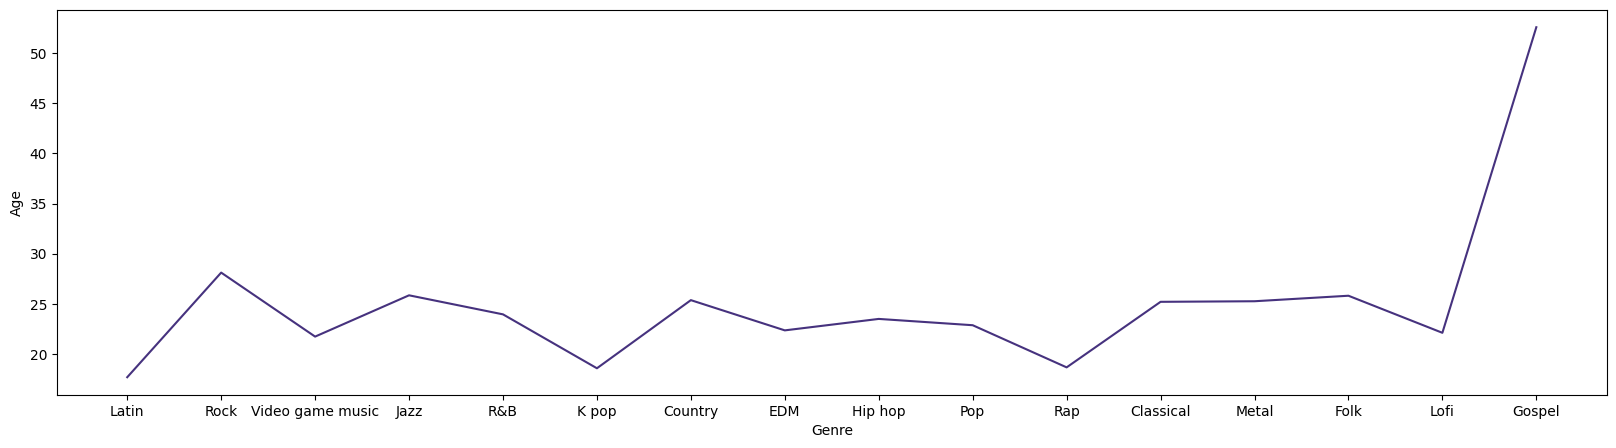

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(y=df['Age'] , x=df['Genre'],ci=None) 

We can see people around 50+ listens to Gospel  and around 20's listens to Latin,K pop , Rap and rest of the age group listens to different Genres


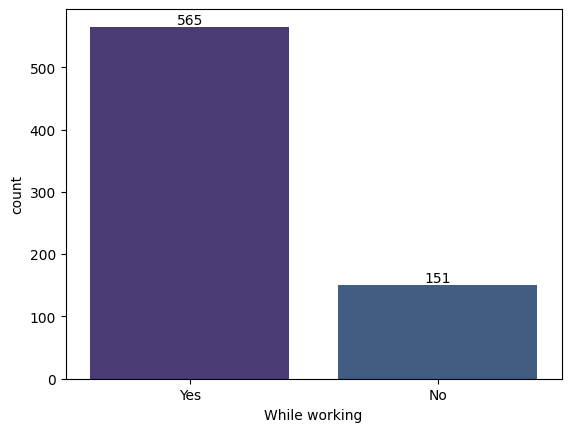

In [19]:
ax =sns.countplot(x=df['While working'])
for label in ax.containers:
    ax.bar_label(label)

Most people listen to music while working 

<Axes: xlabel='Age', ylabel='Hours per day'>

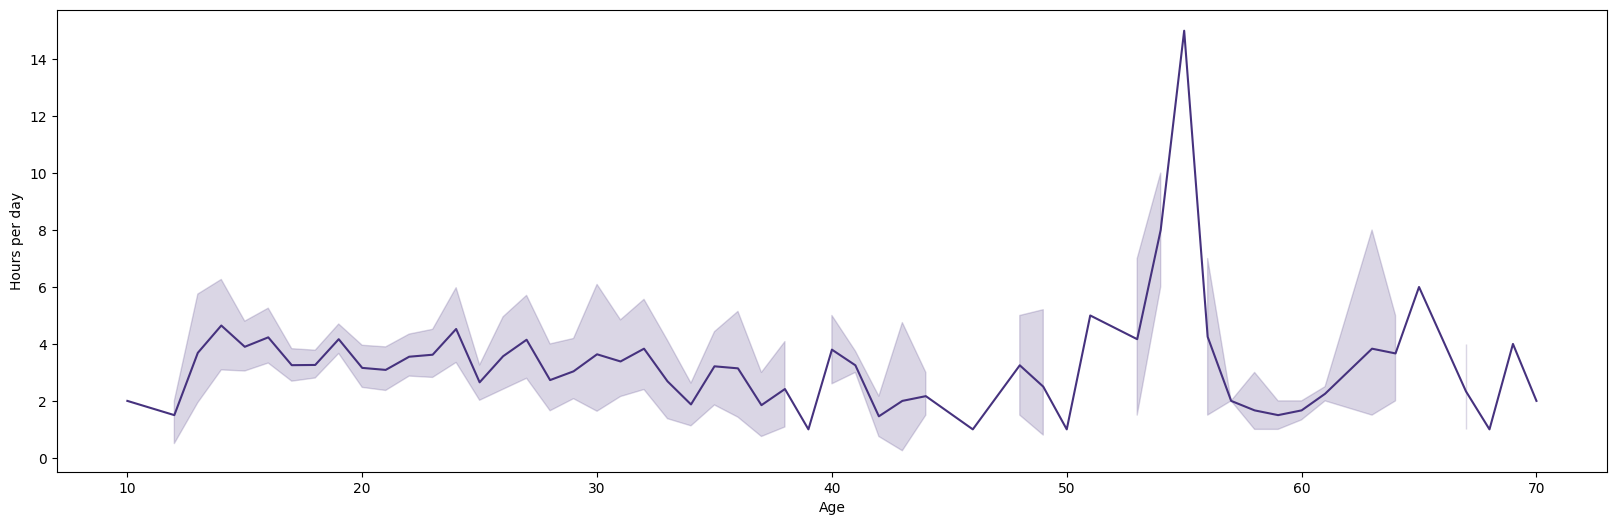

In [20]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Age'],y=df['Hours per day'] )

<Axes: ylabel='Genre'>

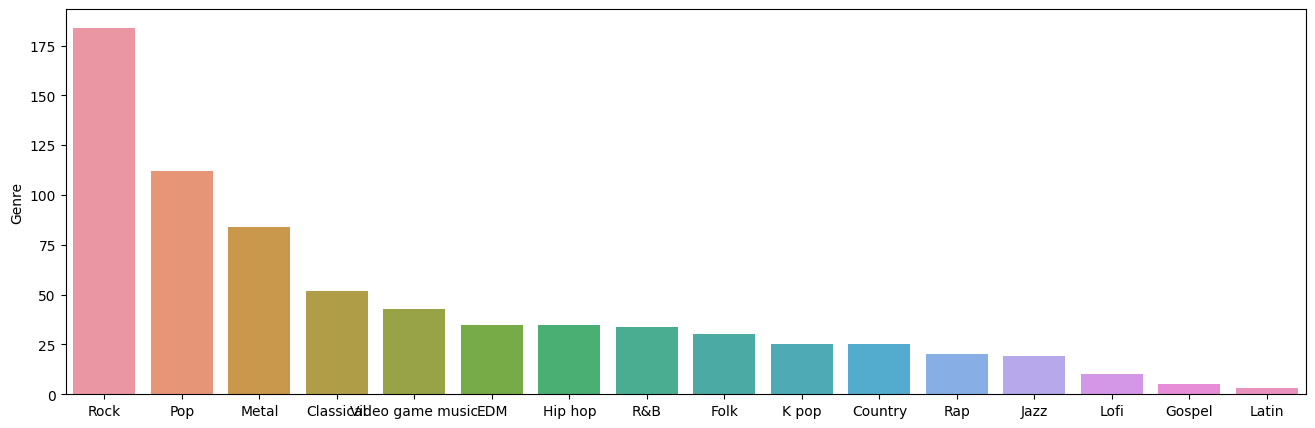

In [21]:
most_genre = df['Genre'].value_counts()

plt.figure(figsize=(16,5))
sns.barplot(y=most_genre, x =most_genre.index)

Rock is the most listened Genre followed by Pop and Metal

<Axes: ylabel='Music effects'>

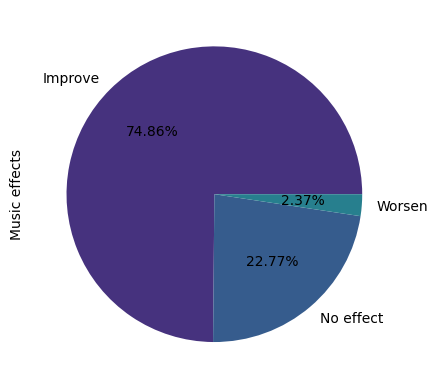

In [42]:
df['Music effects'].value_counts().plot.pie(autopct='%1.2f%%')

Most People mood is improved while listening to Music


Text(0.5, 1.0, "Music listener's Mental Health")

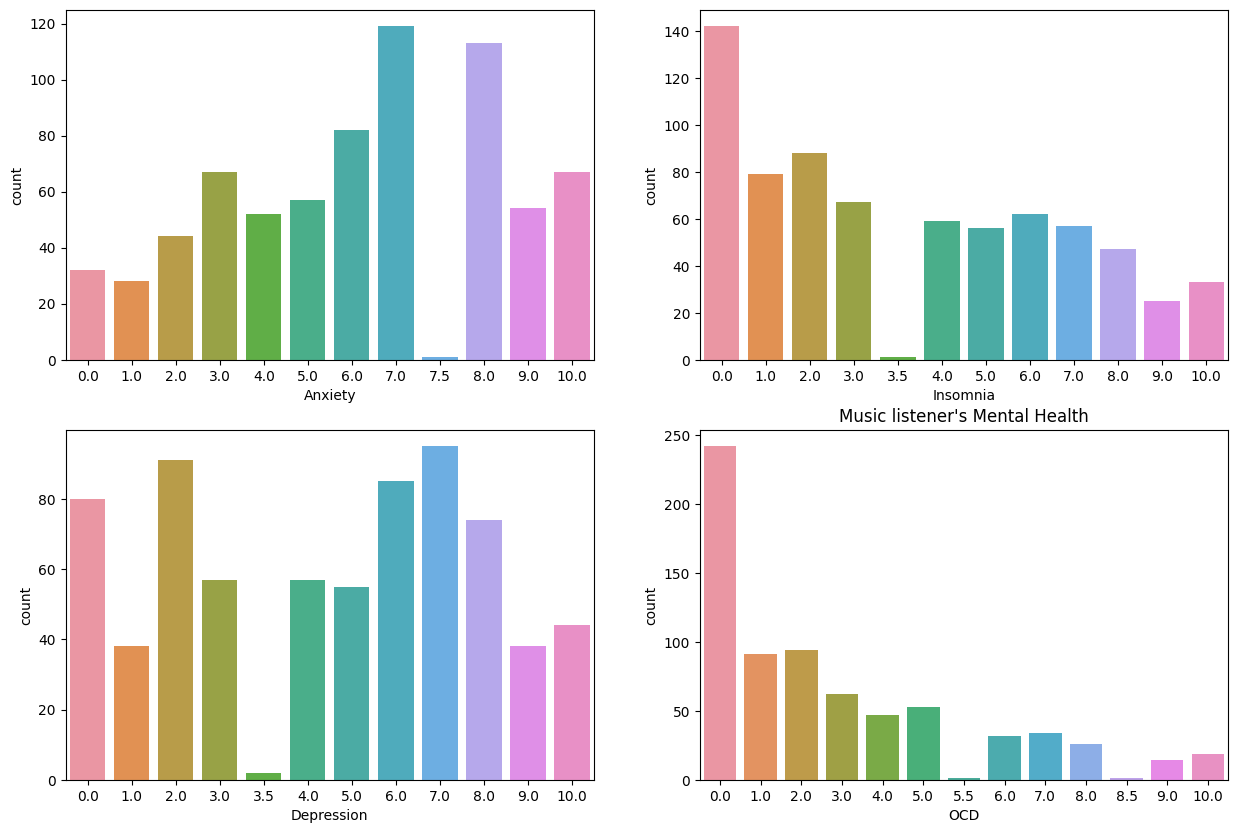

In [31]:
fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)

sns.countplot(x=df['Anxiety'] , ax=ax[0,0])
sns.countplot(x=df['Depression'], ax=ax[1,0])
sns.countplot(x=df['Insomnia'] , ax=ax[0,1])
sns.countplot(x=df['OCD'] ,ax=ax[1,1])

plt.title("Music listener's Mental Health")



Most popular streaming service ?  
        Spotify is the most used streaming service.

Poeple age who listen to music a lot ? 
        Between the age of 15 and 23 listens to a lot. 
        
Genre based on their age ? 
         50+ listens to Gospel  and around 20's listens to Latin,K pop , Rap and rest of the age group listens to different Genres.

How many users listen to music while working?
        around 565 people listen to music while working.
        
most listened genre?
        Rock is the most listened Genre followed by Pop and Metal
        
does music helps their mood?
        Yes it helps to majority of the people 
